In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sig
import asp_func as f

# Week 9 LMS Algorithm

### Problem 1

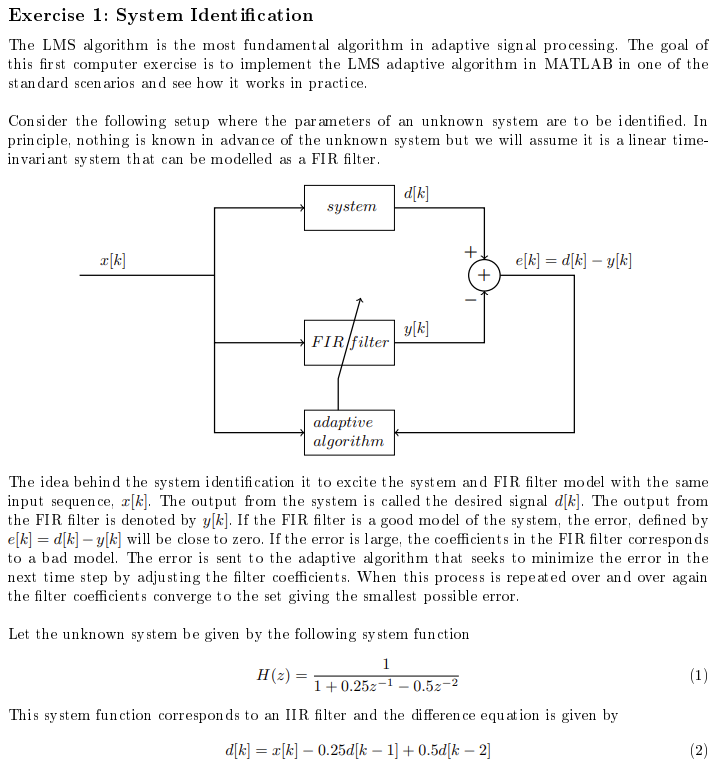

#### 1)
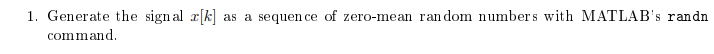

In [2]:
N = 5000 #Number of samples in the sequence xk
xk = np.random.randn(N)
len(xk)

5000

#### 2)
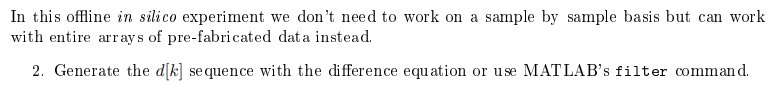

5000


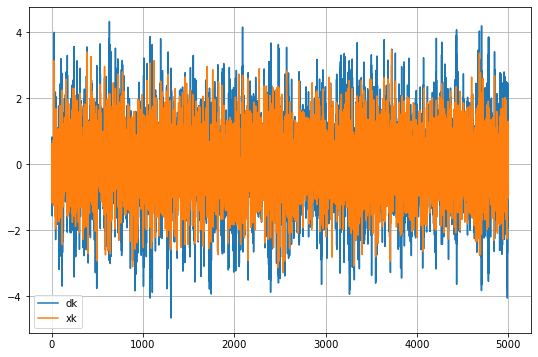

In [3]:
# Alternative
# dk = []
# for i in range(N):
#     try:
#         dk.append(xk[i] - 0.25*dk[-1] + 0.5*dk[-2])
#     except:
#         try:
#             dk.append(xk[i] - 0.25*dk[-1])
#         except:
#             dk.append(xk[i])


H_num = np.array([1])
H_den = np.array([1, 0.25, -0.5])
dk = sig.lfilter(H_num, H_den, xk)
print(len(dk))

fig, ax = plt.subplots(figsize=(9,6))
ax.plot(dk, label="dk")
ax.plot(xk, label="xk")
ax.legend()
ax.grid()
plt.show()

#### 4)
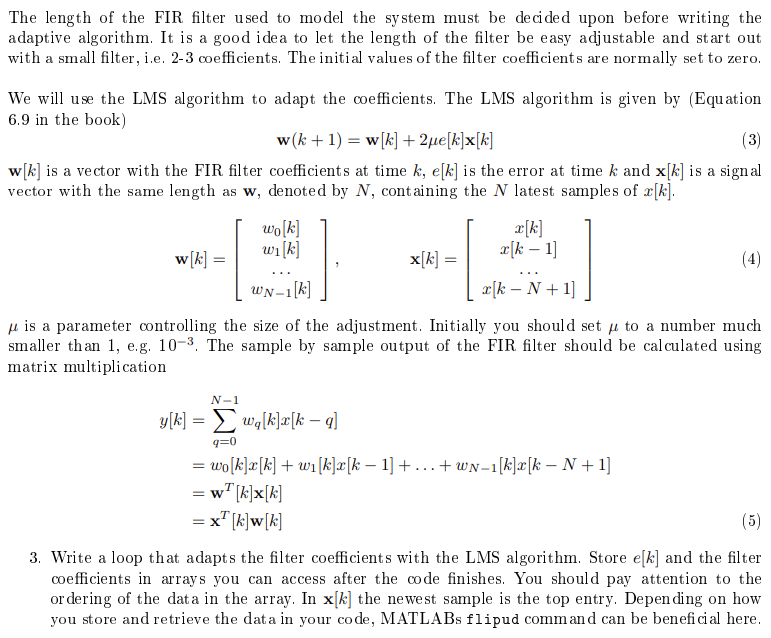

In [4]:
def LMS(x, d, order, step): #Takes data sequence (x), desired signal (d), number of filter taps (order), step-size (step)
    N = len(x)
    ws = np.zeros((N, order))
    ys = np.zeros(N)
    error = np.zeros(N)
    w = np.zeros(Nc)
    x_in = np.zeros(Nc)
    
    for k in range(N):
        ws[k] = w
        x_in = np.insert(x_in, 0, x[k])
        x_in = np.delete(x_in, -1)
        ys[k] = np.dot(w, x_in)
        error[k] = d[k] - ys[k]
        w = w + 2*step*error[k]*x_in
    return ws, error

#### 4)
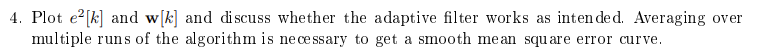

Estimated average weights: [ 1.00094176 -0.25071063  0.56197831]
Final MSE: 0.41670708972895193


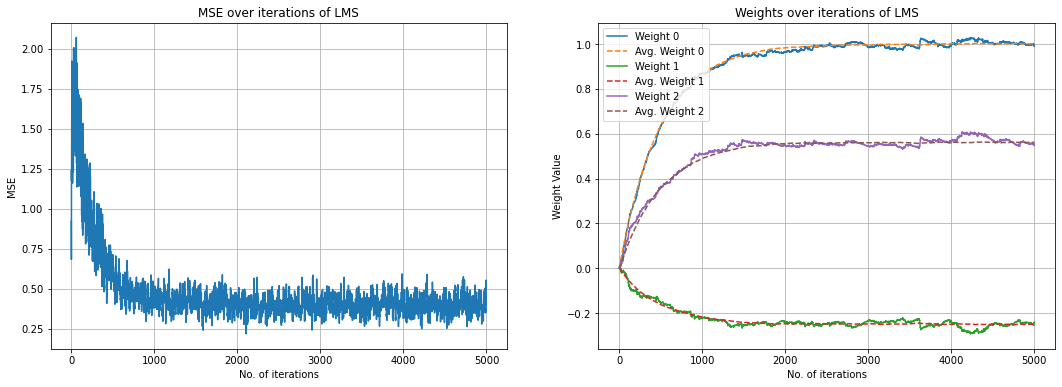

In [5]:
Nc = 3 #Number of taps in the FIR filter
μ = 0.001 #Fixed Step-size parameter
N_turns = 100
err_turns = np.zeros((N_turns, N))
w_turns = np.zeros((N_turns, N, Nc))

for n in range(N_turns):
    xk = np.random.randn(N)
    dk = sig.lfilter(H_num, H_den, xk)
    wt, et = LMS(xk, dk, Nc, μ)
    err_turns[n] = et**2
    w_turns[n] = wt
MSE = np.mean(err_turns, axis=0)

mean_weights = np.zeros((Nc, N))
for w in range(Nc):
    mean_weights[w] = np.mean(w_turns[:,:,w], axis=0)

print("Estimated average weights:", mean_weights[:,-1])
print("Final MSE:", MSE[-1])

fig, ax = plt.subplots(1,2,figsize=(18,6))
ax[0].plot(MSE)
ax[0].set_xlabel("No. of iterations")
ax[0].set_ylabel("MSE")
ax[0].set_title("MSE over iterations of LMS")
ax[0].grid()
for w in range(Nc):
    ax[1].plot(wt[:,w], label=f"Weight {w}")
    ax[1].plot(mean_weights[w], label=f"Avg. Weight {w}", linestyle="--")
ax[1].set_xlabel("No. of iterations")
ax[1].set_ylabel("Weight Value")
ax[1].set_title("Weights over iterations of LMS")
ax[1].legend()
ax[1].grid()
plt.show()

#### 5)
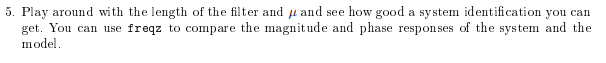

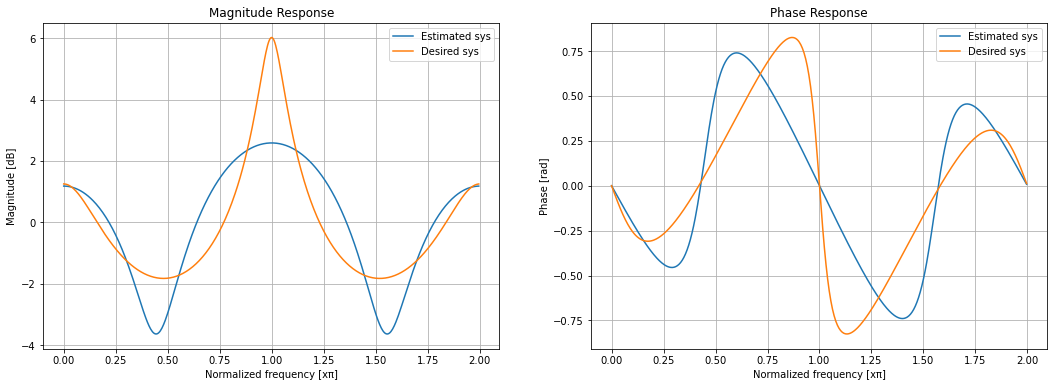

In [6]:
num_est = mean_weights[:,-1]
den_est = np.array([1])
fig, ax = plt.subplots(1,2,figsize=(18,6))
f.plotMagResponse(num_est, den_est, db=True, ax=ax[0])
f.plotMagResponse(H_num, H_den, db=True, ax=ax[0])
ax[0].legend(("Estimated sys", "Desired sys"))
ax[0].set_xlabel("Normalized frequency [xπ]")
ax[0].set_ylabel("Magnitude [dB]")
ax[0].set_title("Magnitude Response")
ax[0].grid()
f.plotPhaseResponse(num_est, den_est, ax=ax[1])
f.plotPhaseResponse(H_num, H_den, ax=ax[1])
ax[1].legend(("Estimated sys", "Desired sys"))
ax[1].set_xlabel("Normalized frequency [xπ]")
ax[1].set_ylabel("Phase [rad]")
ax[1].set_title("Phase Response")
ax[1].grid()
plt.show()

#### 6)


Estimated average weights: [0.44744624 0.44444016 0.44141684]
Final MSE: 5.436490673084522e-09


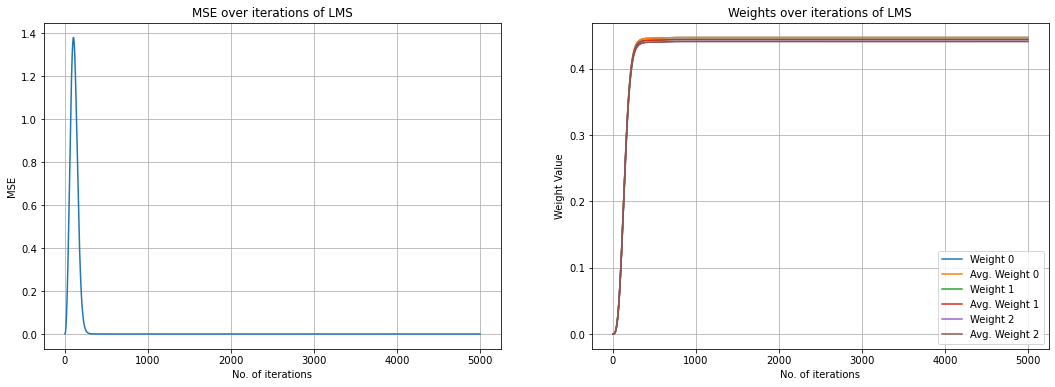

In [7]:
Nc = 3 #Number of taps in the FIR filter
μ = 0.001 #Fixed Step-size parameter
N_turns = 100
err_turns = np.zeros((N_turns, N))
w_turns = np.zeros((N_turns, N, Nc))
t = np.linspace(0,10,N)
f0 = 0.5
for n in range(N_turns):
    xk2 = 2*np.sin(2*np.pi*f0*t) #Changed to a sine wave
    dk2 = sig.lfilter(H_num, H_den, xk2)
    wt, et = LMS(xk2, dk2, Nc, μ)
    err_turns[n] = et**2
    w_turns[n] = wt
MSE = np.mean(err_turns, axis=0)

mean_weights = np.zeros((Nc, N))
for w in range(Nc):
    mean_weights[w] = np.mean(w_turns[:,:,w], axis=0)

print("Estimated average weights:", mean_weights[:,-1])
print("Final MSE:", MSE[-1])

fig, ax = plt.subplots(1,2,figsize=(18,6))
ax[0].plot(MSE)
ax[0].set_xlabel("No. of iterations")
ax[0].set_ylabel("MSE")
ax[0].set_title("MSE over iterations of LMS")
ax[0].grid()
for w in range(Nc):
    ax[1].plot(wt[:,w], label=f"Weight {w}")
    ax[1].plot(mean_weights[w], label=f"Avg. Weight {w}")
ax[1].set_xlabel("No. of iterations")
ax[1].set_ylabel("Weight Value")
ax[1].set_title("Weights over iterations of LMS")
ax[1].legend()
ax[1].grid()
plt.show()

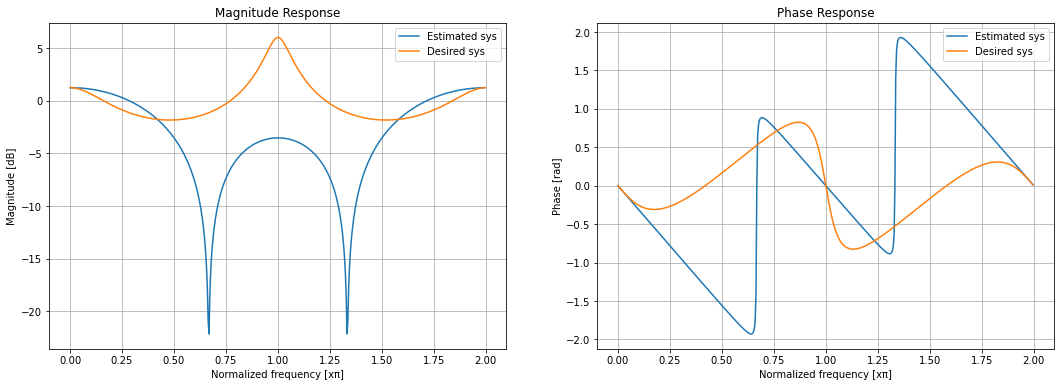

In [8]:
num_est = mean_weights[:,-1]
den_est = np.array([1])
fig, ax = plt.subplots(1,2,figsize=(18,6))
f.plotMagResponse(num_est, den_est, db=True, ax=ax[0])
f.plotMagResponse(H_num, H_den, db=True, ax=ax[0])
ax[0].legend(("Estimated sys", "Desired sys"))
ax[0].set_xlabel("Normalized frequency [xπ]")
ax[0].set_ylabel("Magnitude [dB]")
ax[0].set_title("Magnitude Response")
ax[0].grid()
f.plotPhaseResponse(num_est, den_est, ax=ax[1])
f.plotPhaseResponse(H_num, H_den, ax=ax[1])
ax[1].legend(("Estimated sys", "Desired sys"))
ax[1].set_xlabel("Normalized frequency [xπ]")
ax[1].set_ylabel("Phase [rad]")
ax[1].set_title("Phase Response")
ax[1].grid()
plt.show()

#### 7)
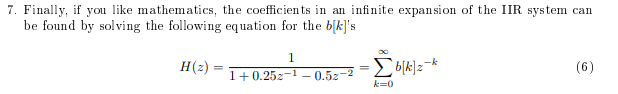